
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The no-show appointments dataset dataset has 14 variables:

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female
* DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor
* DataAgendamento: The day someone called or registered the appointment
* Age: How old is the patient
* Neighbourhood: Where the appointment takes place
* Scholarship: True or False
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient
* No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

In this project I will answer:
* Is there a correlation between patient's age and missing the appointment?
* Is there a correlation between receiving /not receiving an SMS message and missing the pointment?
* Is there a correlation between neighborhood and missing the appointment?



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import pylab as pl


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [57]:
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
# size of the dataset
df.shape

(110527, 14)

Dataset includes 110527 rows and 14 colomns

In [59]:
# Check if there is any duplicated values
sum(df.duplicated())

0

Dataset does not include any duplicate row

In [60]:
# Check if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Dataset does not include null value

In [61]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The Age column shows a minimum age of -1, which is error.It should be postive value. 
* The Handcap column shows a maximum value 4, which is error.It should be 0 or 1.

In [62]:
# to check the value 
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [63]:
# to check the value 
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [64]:
# show the datatype and duplicate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

In [65]:
 #renaming all columns to simpler names
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day','age', 'neighborhood', 'scholarship',
              'hypertension','diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels    
# to the result
df.head(1)

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [66]:
# remove the ages bellow zero
df = df.query('age >= 0')
# To see the result 
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [67]:
# remove the weird values from handcap variable
df = df.query('handicap <= 1' )
# To see the result 
df['handicap'].unique()

array([0, 1], dtype=int64)

In [68]:
#convert no show data to 0 and 1 instead of 'No' and 'Yes' to make it easy to use  
#0 = Showed up to appointment
df.no_show.replace('No',0 ,inplace=True)
#1 = did not show up to appointment 
df.no_show.replace('Yes',1 ,inplace=True)
df.head()


,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [69]:
# Converting scheduled day to datetime
df['schedule_day'] = pd.to_datetime(df['schedule_day'], format='%Y-%m-%dT%H:%M:%SZ')
df['schedule_day'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: schedule_day, dtype: datetime64[ns]

In [70]:
# Converting appointment day to datetime
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format='%Y-%m-%dT%H:%M:%SZ')
df['appointment_day'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: appointment_day, dtype: datetime64[ns]

In [71]:
#remove some useless column,because appointmentID is a pesonal information and it soes not effect no show 
df.drop(['appointmentID'], axis=1, inplace=True)
df.columns

Index(['patientID', 'gender', 'schedule_day', 'appointment_day', 'age',
       'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [72]:
#remove some useless column,because patientID is a pesonal information and it soes not effect no show
df.drop(['patientID'], axis=1, inplace=True)
df.columns

Index(['gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


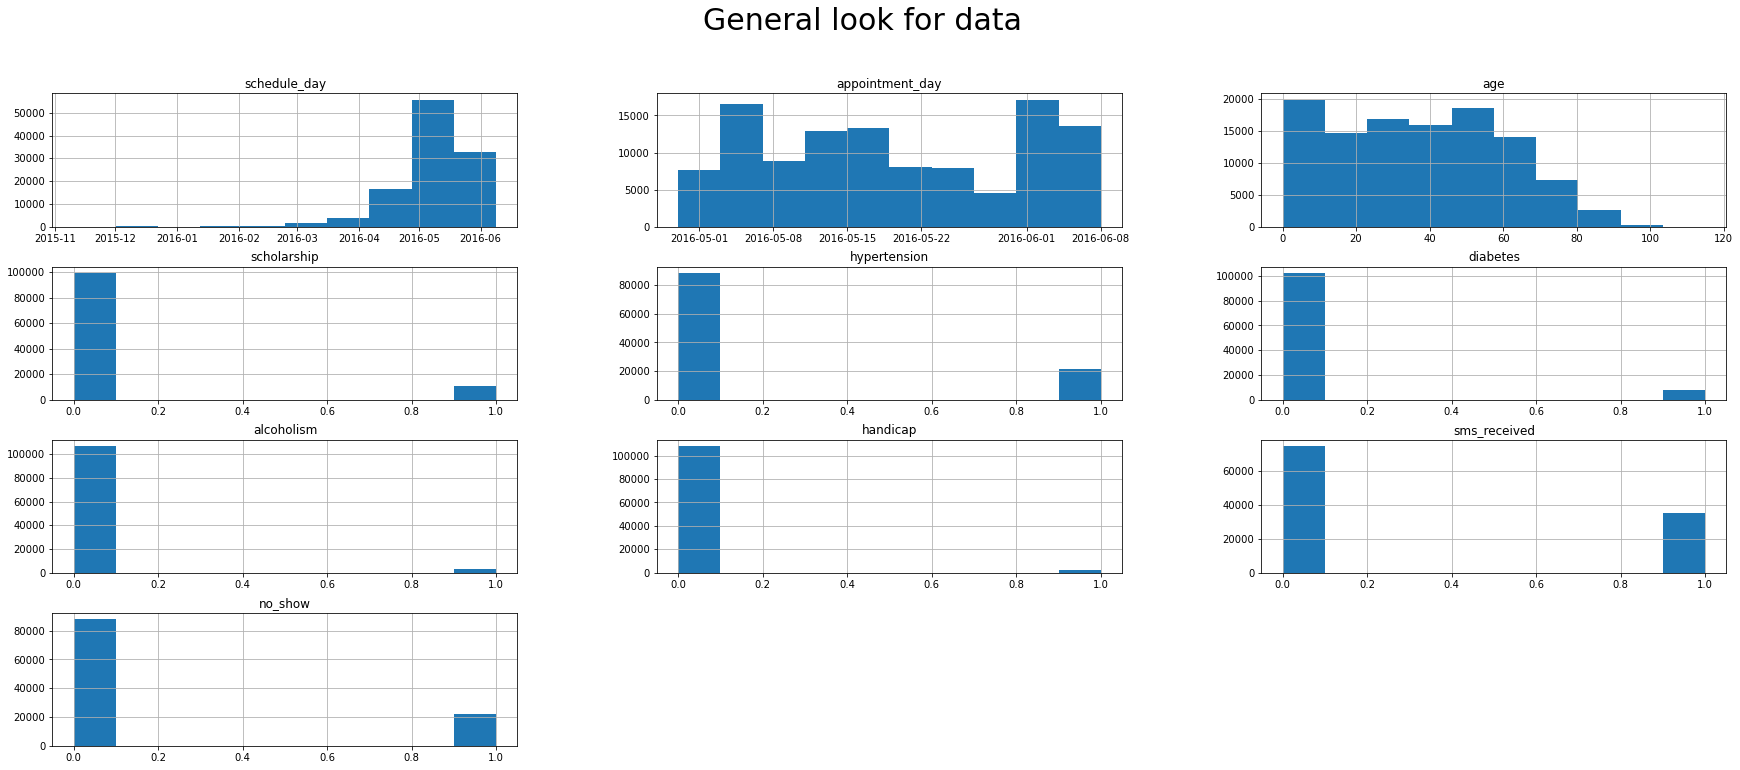

In [73]:
# to see the data 
df.hist(figsize=(30,12))
pl.suptitle("General look for data", fontsize=30);

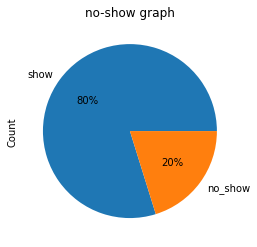

In [74]:
df["no_show"].value_counts().plot(kind="pie",labels=["show","no_show"], autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("no-show graph");

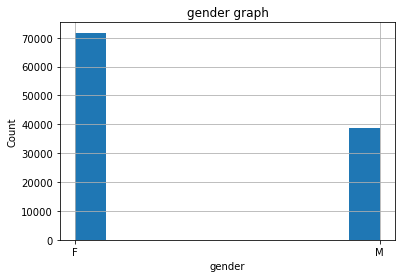

In [75]:
# to see the gender
df.gender.hist()
plt.ylabel("Count")
plt.xlabel("gender")
plt.title("gender graph");

In [76]:
# to see the neighborhood 
df['neighborhood'].unique()


array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

# From the graph  
80% of patients show in their appointment and only 20 no show patients 
  * The schudual day between 2 to 6 2016.
  * The appointment day between 5 to 6 2016.
  * Most patients are bellow 60 years old.
  * Most patients do not have scholarship.
  * Most patients doesn't suffer from alcoholism/diabetes/hipertension.
  * Most patients are not handicapped.
  * Most patientsdoesn't received a reminder sms.

# From my observation I will check:

 * age because it has different distribution which may effect.
 * neighborhood because it has different values
 * sms_received because it has the most difference value between the other boolean variables.
 * gender 
 

### Research Question 1 :Is there a correlation between patient's age and missing the appointment?

In [77]:
# get the median amount of alcohol content
df.age.median()

37.0

In [78]:
# get the median amount of alcohol content
low_age = df.query('age < 37.0')
high_age = df.query('age>= 37.0')

In [79]:
# get the relation between no_show and low age in number
show_low = low_age.query('no_show == 0').count()
noshow_low = low_age.query('no_show == 1').count()

show_low['no_show'],noshow_low['no_show']

(42070, 12431)

In [80]:
# get the relation between no_show and high age in number
show_high = high_age.query('no_show == 0').count()
noshow_high = high_age.query('no_show == 1').count()

show_high['no_show'],noshow_high['no_show']

(45979, 9847)

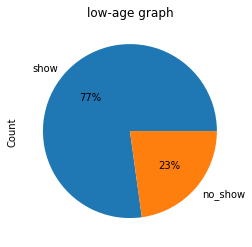

In [81]:
low_age["no_show"].value_counts().plot(kind="pie",labels=["show","no_show"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("low-age graph");

77% of low age patients show and only 23% no show 

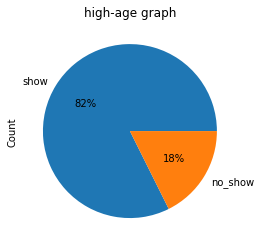

In [82]:
high_age["no_show"].value_counts().plot(kind="pie",labels=["show","no_show"],autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("high-age graph");

82% of high age patients show and only 18% no show

that means no-showing rate decreases on the older person.

### Research Question 2  :Is there a correlation between receiving  an SMS message and missing the pointment?

In [83]:
# patient who recive sms 
re = df.query('sms_received == 1')
re_show = re['no_show'].value_counts()
re_show

0    25660
1     9775
Name: no_show, dtype: int64

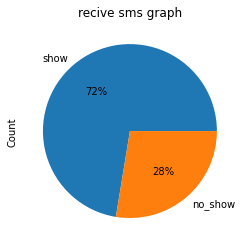

In [84]:
re_show.plot(kind="pie",labels=["show","no_show"],autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("recive sms graph");

For the pateients who recive sms 
* 72% show 
* 28% not show 

In [85]:
# patient who not recive sms 
re_no = df.query('sms_received == 0')
re_no_show = re_no['no_show'].value_counts()
re_show

0    25660
1     9775
Name: no_show, dtype: int64

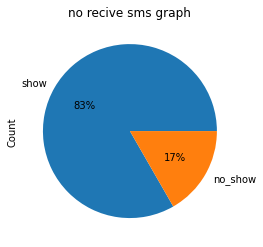

In [86]:
re_no_show.plot(kind="pie",labels=["show","no_show"],autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("no recive sms graph");

For the pateients who not recive sms 
* 83% show 
* 17% not show 

The patients who received an SMS have a higher percentage of missing the appointments 28% to paient who didn't recive SMS 17%.

### Research Question 3 :Is there a correlation between neighborhood and missing the appointment?


In [87]:
# to see all neighborhood.value
df.neighborhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighborhood, Length: 81, dtype: int64

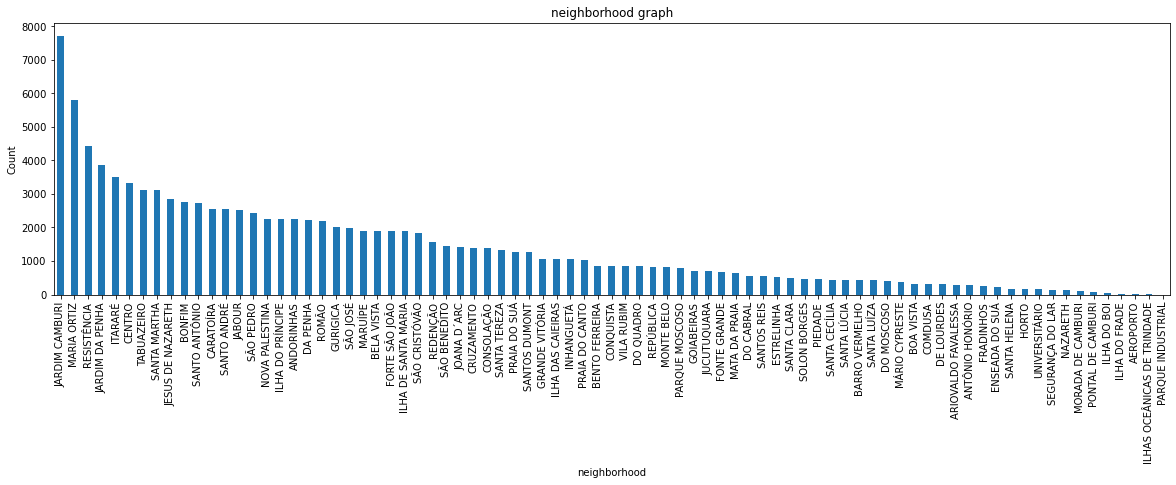

In [88]:
# to visulaize all neighborhood.value
df.neighborhood.value_counts().plot(kind="bar",figsize=(20,5))
plt.ylabel("Count")
plt.xlabel("neighborhood")
plt.title("neighborhood graph");

JARDIM CAMBURI neighborhood has a lot of appointments

In [89]:
# select samples for no show 
n_no_show = df.query('no_show == 1')
n_no_show['neighborhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         921
RESISTÊNCIA                     903
CENTRO                          701
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: neighborhood, Length: 80, dtype: int64

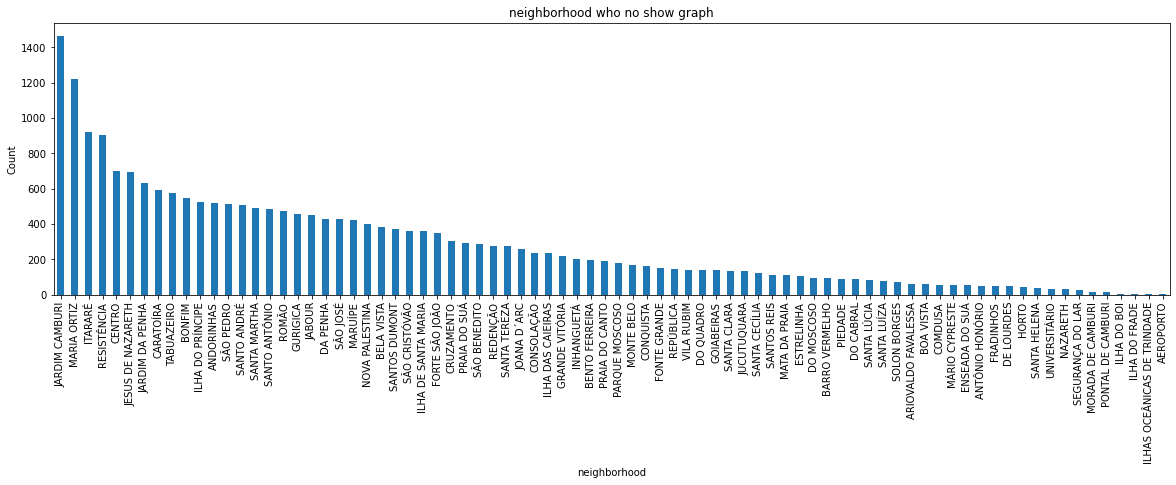

In [90]:
# to see which neighborhood has the most no show  
n_no_show['neighborhood'].value_counts().plot(kind="bar",figsize=(20,5))
plt.ylabel("Count")
plt.xlabel("neighborhood")
plt.title("neighborhood who no show graph");

JARDIM CAMBURI neighborhood has a maximum number of no show appointment 
I we couldn't find that if neighborhoods have a relation with a miss appointment 

<a id='conclusions'></a>
## Conclusions
* patients are more likely to show in their appointment. 
* patients under 37 are more likely to miss their appointments.
* patients above or equal 37 are more likely to show their appointments.
* Receiving an SMS did not increase the chance that the patient would show to their appointment.
* neighborhoods does not have correlation with show or miss appointment. 


# Limitations:
* The minimum Age was -1. 
* Handicap should be 0 or 1, but the max is 4. 
* The lack data on the dataset such as neighborhood it should include the distance between patient and hospital.

Reference:N/A

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295